<a href="https://colab.research.google.com/github/umutcanc7/DSA210-PROJECT-/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Performance:
Mean Absolute Error (MAE): 2154.31
R-squared (R2): 0.01


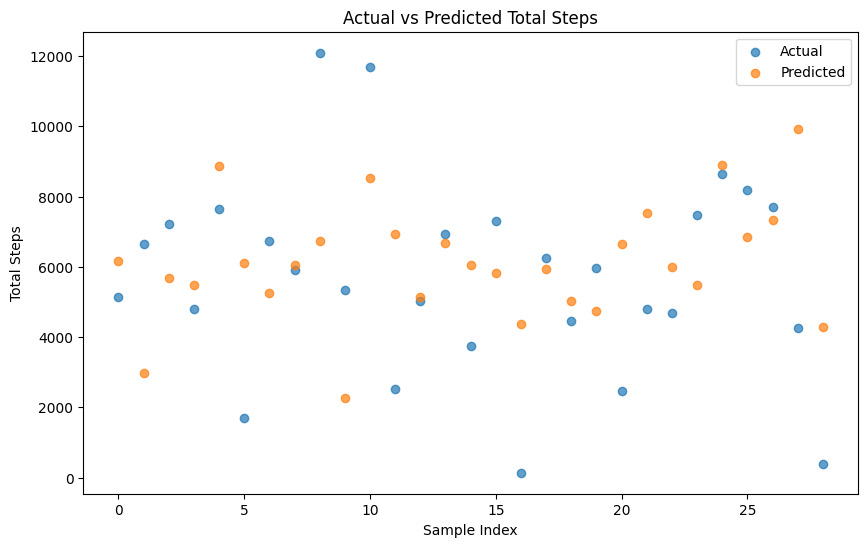

Predicted Total Steps: 5437.72


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

match_data_path = "match_data.csv"
step_count_path = "step_count.csv"

match_data = pd.read_csv(match_data_path)
step_count = pd.read_csv(step_count_path)

match_data['Date'] = pd.to_datetime(match_data['Date'], format='%d.%m.%Y')
step_count['Date'] = pd.to_datetime(step_count['Date'], format='%Y-%m-%d')

merged_data = pd.merge(step_count, match_data, on='Date', how='left')

merged_data['Time'] = merged_data['Time'].fillna('None')
merged_data['Score'] = merged_data['Score'].fillna('None')
merged_data['Result'] = merged_data['Result'].fillna('None')

merged_data['Total Steps'] = pd.to_numeric(merged_data['Total Steps'], errors='coerce')

merged_data['steps_avg_7'] = merged_data['Total Steps'].rolling(window=7).mean()
merged_data['steps_avg_14'] = merged_data['Total Steps'].rolling(window=14).mean()
merged_data['steps_avg_30'] = merged_data['Total Steps'].rolling(window=30).mean()

merged_data_cleaned = merged_data.dropna()

features = merged_data_cleaned[['steps_avg_7', 'steps_avg_14', 'steps_avg_30']]
target = merged_data_cleaned['Total Steps']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

def predict_steps(steps_avg_7, steps_avg_14, steps_avg_30):
    input_features = [[steps_avg_7, steps_avg_14, steps_avg_30]]
    return model.predict(input_features)[0]

def visualize_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.7)
    plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.7)
    plt.title("Actual vs Predicted Total Steps")
    plt.xlabel("Sample Index")
    plt.ylabel("Total Steps")
    plt.legend()
    plt.show()

visualize_predictions(y_test.values, y_pred)

example_prediction = predict_steps(steps_avg_7=5000, steps_avg_14=5200, steps_avg_30=5300)
print(f"Predicted Total Steps: {example_prediction:.2f}")
